In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters
l1_0, l2, r1, r2, r3 = 20.0, 20.0, 0.1, 0.1, 0.1
epsilon, omega, mu, c = 0.01, 2*np.pi, 0.001, 0.00001
t0 = 0.0

In [5]:
# Prescribed L2(t)
def L2_func(t):
    return l2 * (1 + epsilon * np.sin(omega * t))

def L2dot(t):
    return l2 * epsilon * omega * np.cos(omega * t)

# Coefficient functions
def A1(L1, a1): return (1/(2*L1) - 1/(3*a1))*(1/(2*np.pi*mu))
def A2(L1, a2): return -(1/(2*L1) - 1/(3*a2))*(1/(2*np.pi*mu))
def A3(L1, L2): return (1/L2 - 1/(L1 + L2))*(1/(4*np.pi*mu))
def B1(L1, L2): return -(1/L1 - 1/(L1 + L2))*(1/(4*np.pi*mu))
def B2(L2, a2): return (1/(2*L2) - 1/(3*a2))*(1/(2*np.pi*mu))
def B3(L2, a3): return -(1/(2*L2) - 1/(3*a3))*(1/(2*np.pi*mu))

# f and g as functions of L1 and L2
def f(L1, L2):
    a1 = A1(L1, r1)
    a2 = A2(L1, r2)
    a3 = A3(L1, L2)
    b1 = B1(L1, L2)
    b2 = B2(L2, r2)
    b3 = B3(L2, r3)
    return (1 - a1*c - a2*b3/(a2*b3 - a3*b2) - a3*b2/(a3*b2 - b3*a2)
            - a3*(a2*b1 - b2*a1)*c/(a2*b3 - a3*b2) - a3*(a2*b1 - b2*a1)*c/(a3*b2 - b3*a2))

def g(L1, L2):
    a1 = A1(L1, r1)
    a2 = A2(L1, r2)
    a3 = A3(L1, L2)
    b1 = B1(L1, L2)
    b2 = B2(L2, r2)
    b3 = B3(L2, r3)
    return (a2*a3/(a2*b2 - a3*b2) + a2*a3/(a3*b2 - b3*a2))

# ODE for L1
def dL1_dt(t, L1):
    L2 = L2_func(t)
    return - (g(L1, L2)/f(L1, L2)) * L2dot(t)


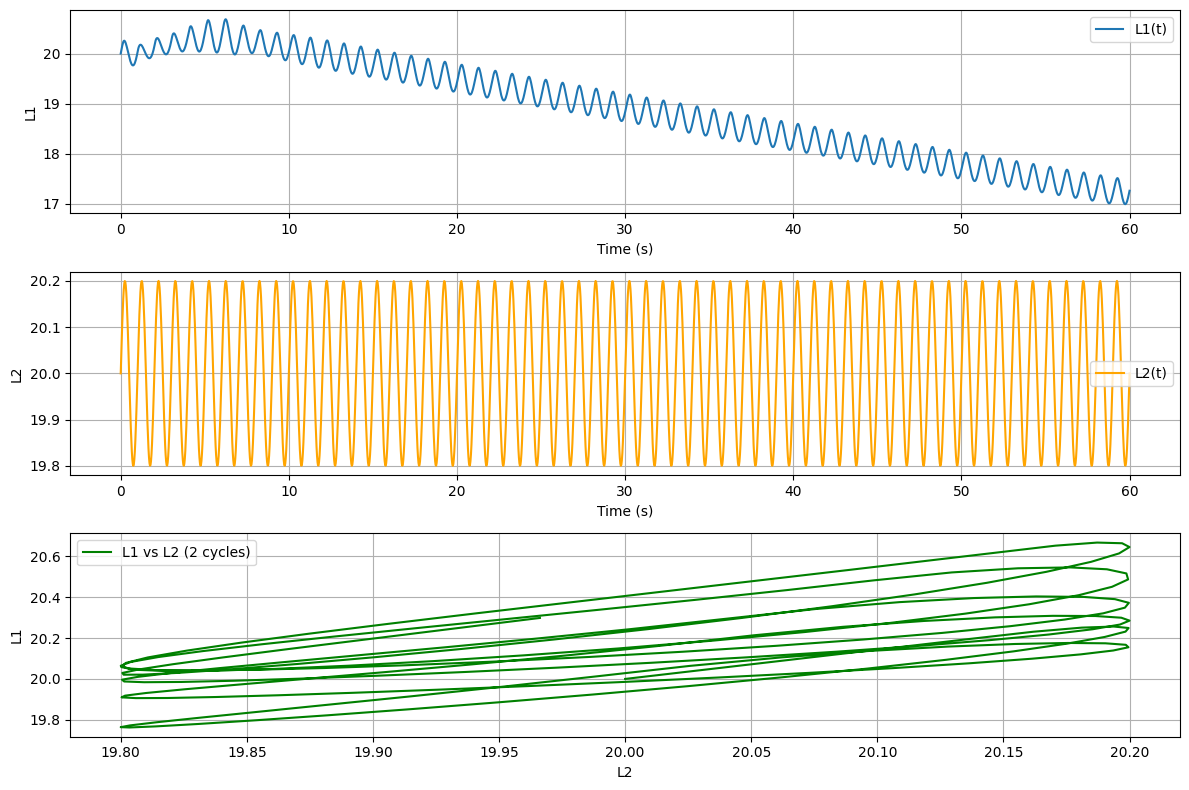

In [10]:

# Solve ODE
t_span = (t0, 60)  # integrate from t=0 to t=10 s
t_eval = np.linspace(*t_span, 2000)
sol = solve_ivp(dL1_dt, t_span, [l1_0], t_eval=t_eval, method='RK45')

# Access solution
time = sol.t
L1_values = sol.y[0]
L2_values = L2_func(time)

# ---- PLOTS ----
plt.figure(figsize=(12,8))

# L1 vs t
plt.subplot(3,1,1)
plt.plot(time, L1_values, label="L1(t)")
plt.xlabel("Time (s)")
plt.ylabel("L1")
plt.grid(True)
plt.legend()

# L2 vs t
plt.subplot(3,1,2)
plt.plot(time, L2_values, label="L2(t)", color="orange")
plt.xlabel("Time (s)")
plt.ylabel("L2")
plt.grid(True)
plt.legend()

# L1 vs L2 (for two cycles)
T = 2*np.pi/omega  # true period
mask = (time >= 0) & (time <= 6*T)  # two cycles
plt.subplot(3,1,3)
plt.plot(L2_values[mask], L1_values[mask], label="L1 vs L2 (2 cycles)", color="green")
plt.xlabel("L2")
plt.ylabel("L1")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
